In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [21]:

train_file=r'/content/drive/MyDrive/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_file=r'/content/drive/MyDrive/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
validation_file=r'/content/drive/MyDrive/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

In [22]:

image_classes=os.listdir(train_file)
image_classes

['healthy_guava', 'fruit_fly', 'Anthracnose']

In [23]:
def plot_images(image_classes):
    plt.figure(figsize=(12, 12))

    for i, category in enumerate(image_classes):
        image_path = os.path.join(train_file, category)  # Correctly combine paths
        if not os.path.exists(image_path):
            print(f"Path does not exist: {image_path}")
            continue

        image_in_folder = os.listdir(image_path)  # List files in the folder
        if not image_in_folder:  # Check if the folder is empty
            print(f"No images found in the folder: {image_path}")
            continue

        first_image = image_in_folder[0]  # Get the first image file
        first_image_path = os.path.join(image_path, first_image)  # Construct full path

        try:
            img = image.load_img(first_image_path)  # Load the image
            img_array = image.img_to_array(img) / 255.0  # Normalize the image
        except Exception as e:
            print(f"Error loading image {first_image_path}: {e}")
            continue

        plt.subplot(4, 4, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


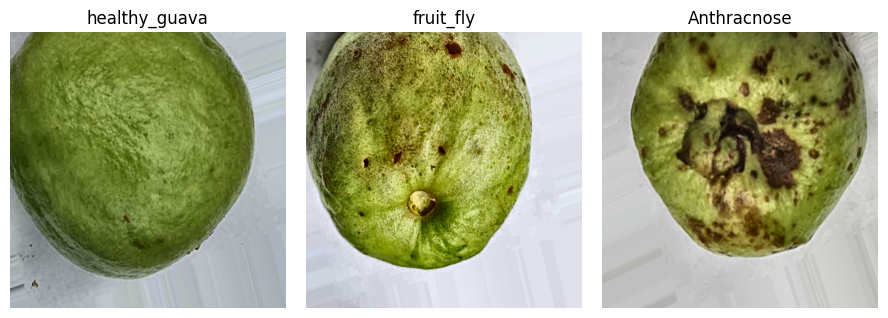

In [24]:
plot_images(image_classes)

In [25]:
image_generator=ImageDataGenerator(rescale=1/255)

In [26]:
train_data=image_generator.flow_from_directory(train_file,
                                             target_size=(224,224),
                                              batch_size=16,
                                              class_mode='categorical'
                                             )

Found 2647 images belonging to 3 classes.


In [27]:
test_data=image_generator.flow_from_directory(test_file,
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='categorical'
                                             )

Found 382 images belonging to 3 classes.


In [28]:
val_data =image_generator.flow_from_directory(validation_file,
                                              target_size = (224,224),
                                               batch_size = 10,
                                               class_mode = 'categorical')

Found 755 images belonging to 3 classes.


In [29]:
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# Add flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

In [30]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
model_history=model.fit(train_data,
                        validation_data=val_data,
                        epochs=5)




Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.5169 - loss: 0.9963 - val_accuracy: 0.8040 - val_loss: 0.4580
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 507s 3s/step - accuracy: 0.8755 - loss: 0.3349 - val_accuracy: 0.9046 - val_loss: 0.2638
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.9323 - loss: 0.1725 - val_accuracy: 0.9444 - val_loss: 0.1466
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 511s 3s/step - accuracy: 0.9676 - loss: 0.0918 - val_accuracy: 0.9735 - val_loss: 0.0850
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9697 - loss: 0.0827 - val_accuracy: 0.9338 - val_loss: 0.2190


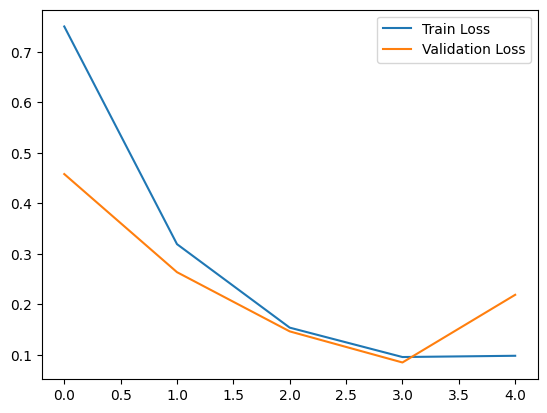

In [32]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [41]:
import numpy as np
def prediction (test_image, actual_label):
    #load & preprocessing image
    testing_img=image.load_img(test_image,target_size=(224,224))  # to let any photo before predicting it be 224,224
    test_img_array=image.img_to_array(testing_img)/255   # convert img to array

    test_img_input=test_img_array.reshape(1, test_img_array.shape[0],        # take the first three dimentions in the array to voncert photo to 224,224,3
                                         test_img_array.shape[1],
                                         test_img_array.shape[2])
    # make prediction
    predicted_class=np.argmax(model.predict(test_img_input))
    predicted_img=class_map[predicted_class]

    plt.figure(figsize=(4,4))
    plt.imshow(test_img_array)
    plt.title(f'Actual Label : {actual_label},Predicted Label: {predicted_class} ')

    plt.grid()
    plt.show()

In [42]:
class_map=dict([value,key] for key , value in train_data.class_indices.items())
class_map

{0: 'Anthracnose', 1: 'fruit_fly', 2: 'healthy_guava'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


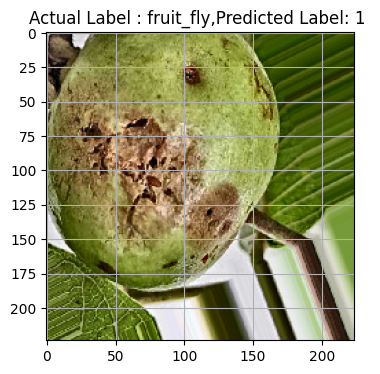

In [44]:
test_image=r'/content/drive/MyDrive/GuavaDiseaseDataset/GuavaDiseaseDataset/test/fruit_fly/19_unsharp_clahe_augmented_5.png'
prediction (test_image, actual_label='fruit_fly')